Introduction: We are Team Thomas Greville, with members:
Yazda Cokgor (yscokgor@berkeley.edu, GIT username: yscokgor)
etc.

Topic & GOur topic is the analysis of AIDS/ HIVs in Botswana.
als: 

Our project focused on anthe effect of AIDS/  HIV on populations, the difference in AIDS/ HIV prevelance on the sexes, on agriculture and exploring why this may be the case and how it differs in opposed to Zimbabwe.

Enjoy our code!1]

[Goal 2]

In [1]:
#Installation of datahubs necessary
%pip install wbdata
import wbdata

%pip install cufflinks
import cufflinks as cf
cf.go_offline()

import numpy as np

#Botswana Code is "BWA"
#Zimbabwe Code is "ZWE"

  Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9
Note: you may need to restart the kernel to use updated packages.
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Getting Indicator for Gender Statistics 
wbdata.get_sources()

gen_stats = 14
indicators_genstat = wbdata.get_indicators (source = gen_stats)
indicators_genstat

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [3]:
#Getting Indicator for Health Nutririon and Population Statistics 
health_nut = 16
indicators_healthnut = wbdata.get_indicators (source = health_nut)
indicators_healthnut

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT

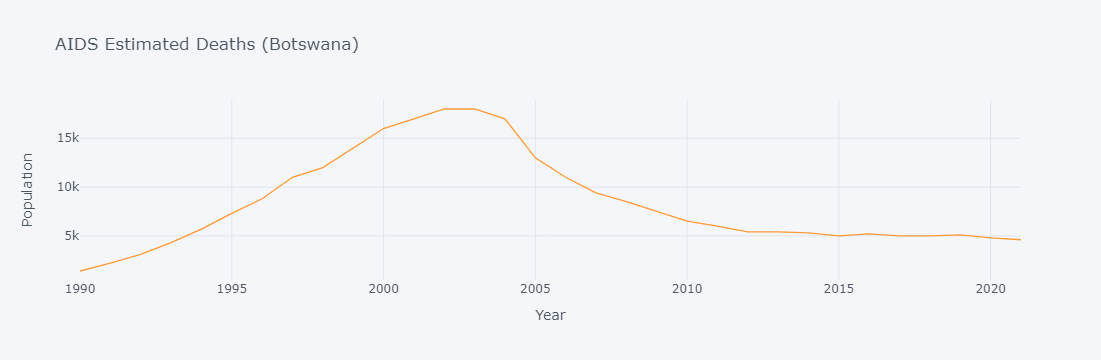

In [4]:
#Aids Estimated Deaths Plotted (Botswana)

aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")
aids.index = aids.index.astype(int)
aids = aids .dropna().sort_index()
aids.iplot(title="AIDS Estimated Deaths (Botswana)",xTitle='Year',yTitle='Population')

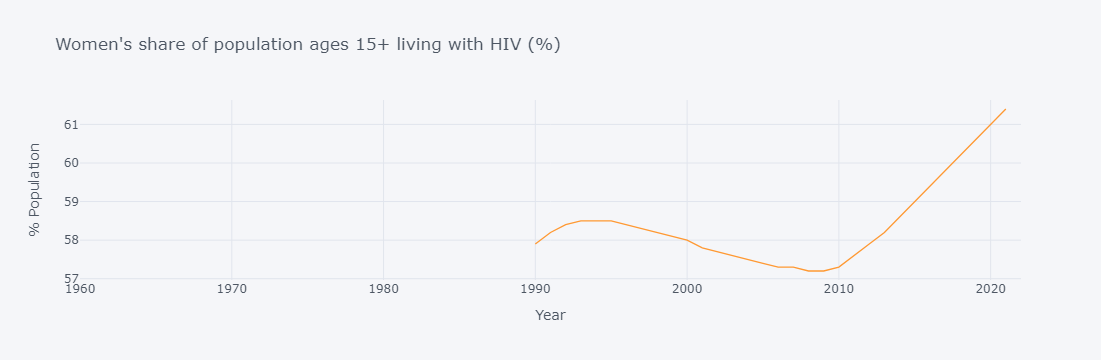

In [5]:
# Women's share of population ages 15+ living with HIV (%) (Botswana)

woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA")

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')


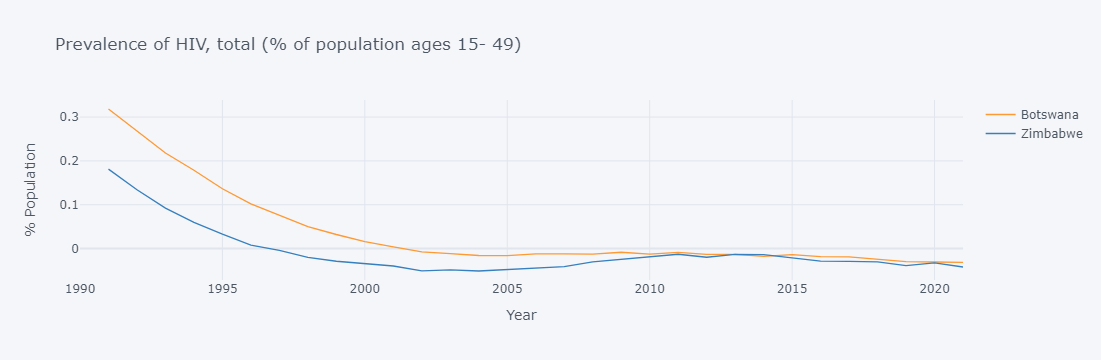

In [6]:
#prevelance of HIV total (% of population ages 15- 49) for both Botswana and Zimbabwe

labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

countries =  {"BWA" : "Botswana",
            "ZWE" : "Zimbabwe",
           }

data = wbdata.get_dataframe(labels, country = countries).squeeze().dropna()

data = data.unstack('country')
data.index = data.index.astype(int)
data = data.sort_index()

np.log(data).diff().iplot(title = "Prevalence of HIV, total (% of population ages 15- 49)",
                          yTitle = "% Population",
                          xTitle = "Year")

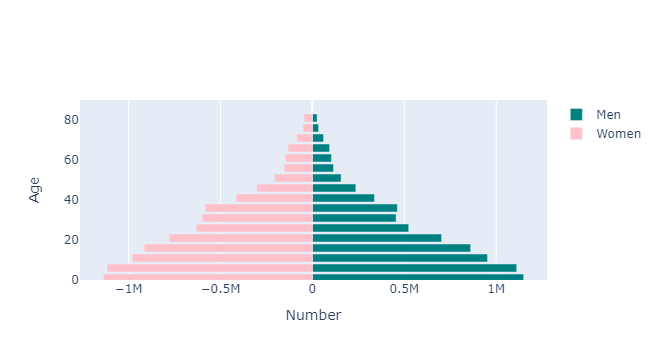

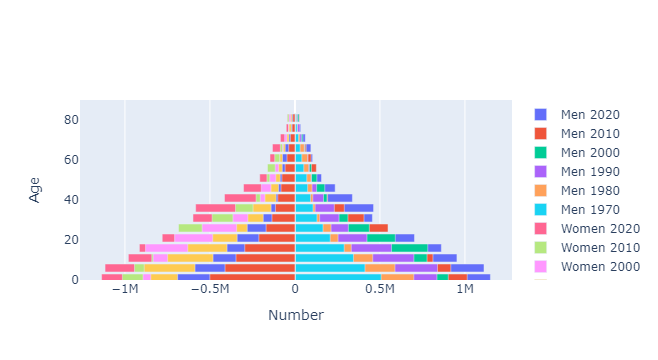

In [35]:
#defining a bunch of functions 
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

#defining pop_pyramid_df to transform the data into the correct dataframe 
def pop_pyramid_df(years, ctry):
    age_rangez = []

    #calculates age ranged based on years given parameter 
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")

    #gets the male variable dictionary and combines with the female variable dictionary 
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    #combines dictionarys 
    variablez = male_variablez
    variablez.update(female_variablez)
    
    #filters data and returns new data frame and list of age ranges 
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return dfz.query("date=='2020'").sum(axis=0), dfz, age_rangez

#calling function
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "ZWE")


py.init_notebook_mode(connected=True)

#defining function to graph population pyramid 
def graph_pop_pyramid(dataframe, age_range, year, color1, color2):
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Men',
               marker=dict(color=color1),
               hoverinfo='skip'
               ),

        go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Women',
               marker=dict(color=color2),
               hoverinfo='skip',
               )
        ]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid on values found for Zimbabwe
graph_pop_pyramid(dfz, age_rangez, 2020, 'teal', 'pink')

#defining a new function to graph population pyramid for multiple years 
def graph_pop_pyramid_years(dataframe, age_range, years):
    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_rangez],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]

    binz += [go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_range],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip',
                   )
             for year in years]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid_years on values found for Zimbabwe
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))


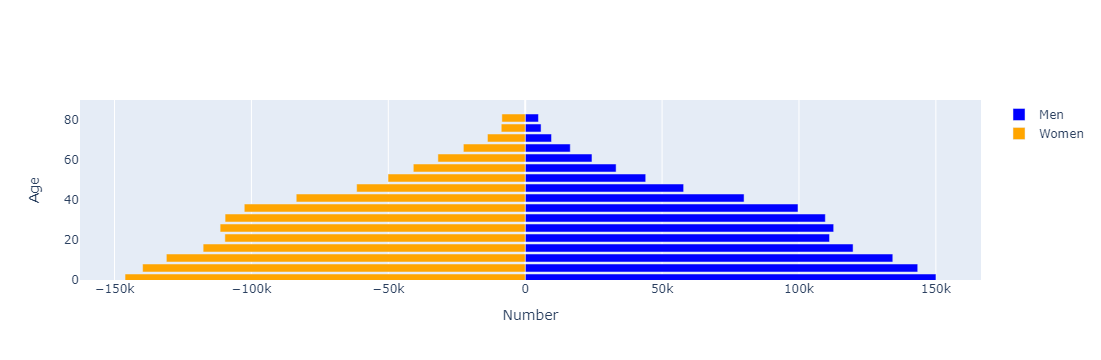

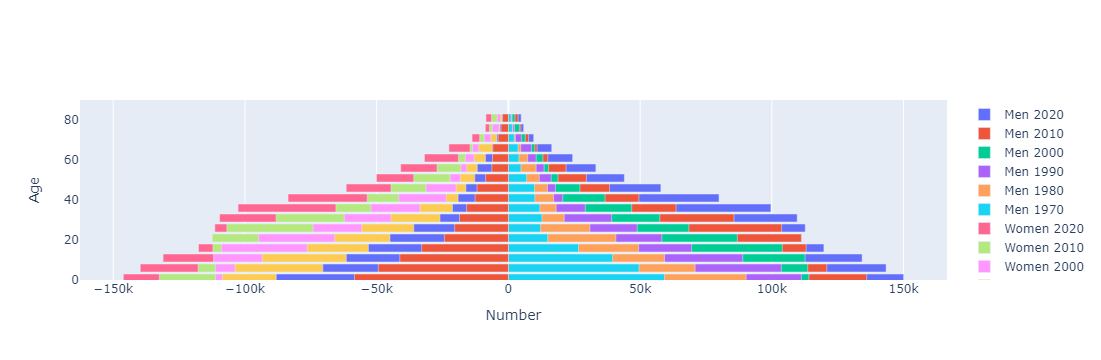

In [34]:
#calling pop_pyramid_df on Botswana 
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "BWA")

py.init_notebook_mode(connected=True)

#calling graph_pop_pyramid on newly defined fpr Botswana dfz
graph_pop_pyramid(dfz, age_rangez, 2020, 'blue', 'orange')

#calling graph_pop_pyramid_years on newly defined for Botswana dfz
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))

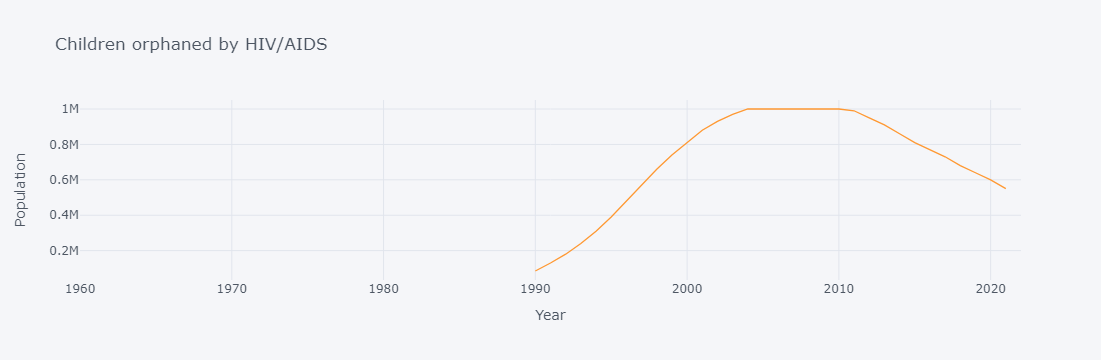

In [37]:
#children in Zimbabwe oprhaned by AIDS/ HIV
orphan_rate= {"SH.HIV.ORPH" : "ZWE"}
orphan = wbdata.get_dataframe(orphan_rate, country = "ZWE")

orphan.index = orphan.index.astype(int)
orphan.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')

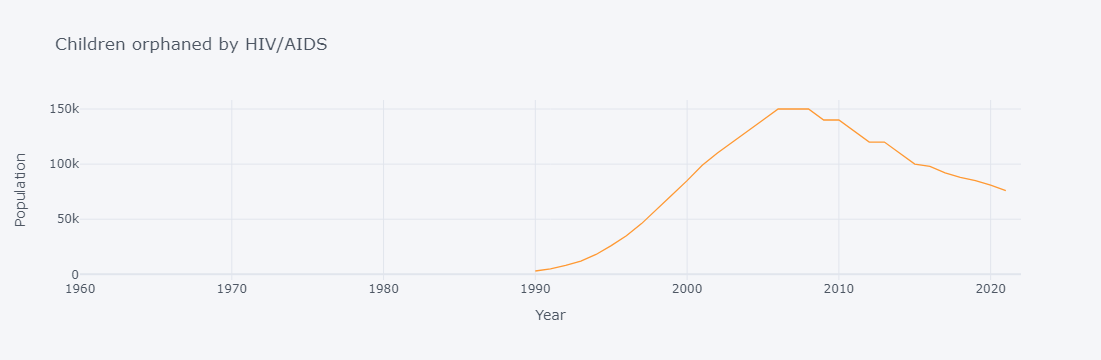

In [38]:
#children in Botswana orphaned by HIV/AIDS
orphan_rateB= {"SH.HIV.ORPH" : "BWA"}
orphanB = wbdata.get_dataframe(orphan_rate, country = "BWA")

orphanB.index = orphanB.index.astype(int)
orphanB.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')